In [28]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [4]:
train_data = '/content/drive/MyDrive/AI/11_LoaiTien/TRAIN'
test_data =  '/content/drive/MyDrive/AI/11_LoaiTien/TEST'
val_data  =  '/content/drive/MyDrive/AI/11_LoaiTien/TEST'

In [5]:
from keras.engine.data_adapter import train_validation_split
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 153 images belonging to 11 classes.
Found 129 images belonging to 11 classes.
Found 129 images belonging to 11 classes.


In [6]:
#ĐẶT NHÃN
class_name = ['100k', '10k', '1k', '200k', '200đ', '20k', '2k', '500k', '500đ', '50k', '5k']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại tien: ",train_input.num_classes)

labels:  ['100k', '10k', '1k', '200k', '200đ', '20k', '2k', '500k', '500đ', '50k', '5k']
match class:  {'100k': 0, '10k': 1, '1k': 2, '200k': 3, '200đ': 4, '20k': 5, '2k': 6, '500k': 7, '500đ': 8, '50k': 9, '5k': 10}
Tổng cộng các loại tien:  11


In [7]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(11,activation='softmax'))  #11 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [8]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
money_train = model.fit(train_input,batch_size=30,epochs=60,verbose=1,validation_data=val_input)

Epoch 1/60
5/5 [==============================] - 5s 1s/step - loss: 1.4366 - accuracy: 0.4641 - val_loss: 3.1093 - val_accuracy: 0.2713
Epoch 2/60
5/5 [==============================] - 5s 978ms/step - loss: 1.4085 - accuracy: 0.4706 - val_loss: 3.2803 - val_accuracy: 0.2791
Epoch 3/60
5/5 [==============================] - 5s 968ms/step - loss: 1.5171 - accuracy: 0.4575 - val_loss: 3.2129 - val_accuracy: 0.3023
Epoch 4/60
5/5 [==============================] - 5s 1s/step - loss: 1.3669 - accuracy: 0.5294 - val_loss: 3.1688 - val_accuracy: 0.2403
Epoch 5/60
5/5 [==============================] - 5s 1s/step - loss: 1.3293 - accuracy: 0.5359 - val_loss: 3.2578 - val_accuracy: 0.2558
Epoch 6/60
5/5 [==============================] - 5s 1s/step - loss: 1.4428 - accuracy: 0.4706 - val_loss: 3.2965 - val_accuracy: 0.2791
Epoch 7/60
5/5 [==============================] - 5s 1s/step - loss: 1.2955 - accuracy: 0.5556 - val_loss: 3.1898 - val_accuracy: 0.2093
Epoch 8/60
5/5 [===================

In [33]:
model.save('/content/drive/MyDrive/AI/11_LoaiTien/money.h5')

array([6])

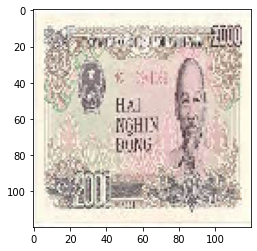

In [38]:
pic = image.load_img('/content/drive/MyDrive/AI/11_LoaiTien/2k.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [39]:
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Mệnh giá : 100.000vnđ")
if guess[0]==1:
  print("Mệnh giá : 10.000vnđ")
if guess[0]==2:
  print("Mệnh giá : 1.000vnđ")
if guess[0]==3:
  print("Mệnh giá : 200.000vnđ")
if guess[0]==4:
  print("Mệnh giá : 200vnđ")
if guess[0]==5:
  print("Mệnh giá : 20.000vnđ")
if guess[0]==6:
  print("Mệnh giá : 2.000vnđ")
if guess[0]==7:
  print("Mệnh giá : 500.000vnđ")
if guess[0]==8:
  print("Mệnh giá : 500vnđ")
if guess[0]==9:
  print("Mệnh giá : 50.000vnđ")
if guess[0]==10:
  print("Mệnh giá: 5.000vnđ") 

Mệnh giá : 2.000vnđ
